In [2]:
import pandas as pd
from xml.etree import ElementTree
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import layers
from keras import models
from collections import Counter
from math import ceil, floor
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger
from keras.layers import Dropout, Conv2D, BatchNormalization, MaxPooling2D , Activation, MaxPooling3D
import os
import matplotlib.pyplot as plt
from keras.layers import TimeDistributed, LSTM, Dense, ConvLSTM2D, Bidirectional
from keras import models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from openpyxl import load_workbook
import seaborn as sns
from functools import cmp_to_key
import pickle
import math

In [3]:
cat_dict = {'acetone':0, 'acetonitrile': 1, 'chloroform':2, 'dichloromethane':3,'diethylether':4,'ethanol':5,'ethylacetate':6,'heptane':7,'hexane':8,'methanol':9,'toluene':10}
cat_dict_reverse = dict(map(reversed,cat_dict.items()))

In [5]:
no_files = 0
paths = list()
for file in os.listdir('sequences_75x75/train'):
    no_files+=1
    paths.append('sequences_75x75/train/'+file)
    
def batch_generator_from_memory(train_files, batch_size = 100):
    indices = np.arange(len(train_files))
    X = list()
    Y = list()
    while True:
        np.random.shuffle(indices)
        for i in indices:
            #aux = np.load('sequences/train/seq_'+str(i)+'.npy', allow_pickle = True)
            aux = np.load(train_files[i], allow_pickle = True)
            X.append(aux[0]/255)
            Y.append(aux[1])
            if len(X)==batch_size:
                yield np.asarray(X), np.asarray(Y)
                X = list()
                Y = list()

In [6]:
no_val_files = 0
val_paths = list()
for i in os.listdir('sequences_75x75/val'):
    no_val_files+=1
    val_paths.append('sequences_75x75/val/'+file)

def validation_generator(val_files, batch_size = 1):
    indices = np.arange(len(val_files))
    X = list()
    Y = list()
    while True:
        for i in indices:
            aux = np.load(val_files[i], allow_pickle = True)
            X.append(aux[0]/255)
            Y.append(aux[1])
            if len(X)==batch_size:
                yield np.asarray(X), np.asarray(Y)
                X = list()
                Y = list()

In [15]:
def prof_LSTM():  
    model = models.Sequential()
    model.add(TimeDistributed(Conv2D(8, (5, 5), strides=(2, 2), activation='relu', padding='same'), input_shape=(32,75,75,3)))
    model.add(TimeDistributed(Conv2D(8, (5,5),padding='same', activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))
    model.add(TimeDistributed(Conv2D(16, (5,5),padding='same', activation='relu')))
    model.add(TimeDistributed(Conv2D(16, (5,5),padding='same', activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))
    model.add(TimeDistributed(Conv2D(32, (5,5),padding='same', activation='relu')))
    model.add(TimeDistributed(Conv2D(32, (5,5),padding='same', activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))
    model.add(TimeDistributed(layers.Flatten()))
    model.add(Dropout(0.5))
    model.add(LSTM(16, return_sequences=False, dropout=0.5))
    #model.add(Bidirectional(LSTM(16, return_sequences=False, dropout=0.5)))
    model.add(Dense(11, activation='softmax'))
    model.summary()
    
    return model

In [17]:
batch_size = 50
num_samples = no_files

model =  prof_LSTM()
save_folder = './CNN2D_LSTM_prof/net_1'
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
csv = CSVLogger(save_folder +'/training.log')
tb = TensorBoard(update_freq='epoch', log_dir = save_folder)
weigths_name="best_weights.h5"
mc = ModelCheckpoint(save_folder+'/'+weigths_name, monitor='val_loss', mode='min', save_best_only=True)
cbs = [mc, tb, csv]
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(batch_generator_from_memory(paths, batch_size = batch_size), 
          steps_per_epoch = ceil(num_samples / batch_size), epochs = 1000, validation_data = validation_generator(val_paths), validation_steps = no_val_files, 
          callbacks = cbs)

f = open(save_folder+"/model_specs.txt", "a")
f.write(str(params[i]))
f.close()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_30 (TimeDis (None, 32, 38, 38, 8)     608       
_________________________________________________________________
time_distributed_31 (TimeDis (None, 32, 38, 38, 8)     1608      
_________________________________________________________________
time_distributed_32 (TimeDis (None, 32, 19, 19, 8)     0         
_________________________________________________________________
time_distributed_33 (TimeDis (None, 32, 19, 19, 16)    3216      
_________________________________________________________________
time_distributed_34 (TimeDis (None, 32, 19, 19, 16)    6416      
_________________________________________________________________
time_distributed_35 (TimeDis (None, 32, 9, 9, 16)      0         
_________________________________________________________________
time_distributed_36 (TimeDis (None, 32, 9, 9, 32)      12832     
__________

KeyboardInterrupt: 

In [4]:
model = models.load_model('CNN2D_LSTM_prof/net_8/best_weights.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_41 (TimeDis (None, 32, 38, 38, 8)     1184      
_________________________________________________________________
time_distributed_42 (TimeDis (None, 32, 38, 38, 8)     3144      
_________________________________________________________________
time_distributed_43 (TimeDis (None, 32, 19, 19, 8)     0         
_________________________________________________________________
time_distributed_44 (TimeDis (None, 32, 19, 19, 16)    6288      
_________________________________________________________________
time_distributed_45 (TimeDis (None, 32, 19, 19, 16)    12560     
_________________________________________________________________
time_distributed_46 (TimeDis (None, 32, 9, 9, 16)      0         
_________________________________________________________________
time_distributed_47 (TimeDis (None, 32, 9, 9, 32)      25120     
__________

In [5]:
preds = list()
true_vals = list()
for file in os.listdir('sequences_75x75/val/'):
    aux = np.load('sequences_75x75/val/'+file, allow_pickle=True)
    preds.append(model.predict((aux[0]/255).reshape((1,32,75,75,3))))
    true_vals.append(np.argmax(aux[1]))

In [6]:
for i in range(len(preds)):
    preds[i] = np.argmax(preds[i][0])

In [7]:
cats = list()
for key in cat_dict:
    cats.append(key)

report = classification_report(true_vals, preds, target_names=cats, output_dict=True)

In [8]:
report

{'acetone': {'precision': 0.9871794871794872,
  'recall': 0.9935483870967742,
  'f1-score': 0.990353697749196,
  'support': 155},
 'acetonitrile': {'precision': 0.9830508474576272,
  'recall': 0.9586776859504132,
  'f1-score': 0.9707112970711298,
  'support': 121},
 'chloroform': {'precision': 0.9907407407407407,
  'recall': 0.9907407407407407,
  'f1-score': 0.9907407407407407,
  'support': 108},
 'dichloromethane': {'precision': 0.963963963963964,
  'recall': 0.8629032258064516,
  'f1-score': 0.9106382978723404,
  'support': 124},
 'diethylether': {'precision': 0.956140350877193,
  'recall': 1.0,
  'f1-score': 0.9775784753363228,
  'support': 109},
 'ethanol': {'precision': 0.9565217391304348,
  'recall': 0.990990990990991,
  'f1-score': 0.9734513274336283,
  'support': 111},
 'ethylacetate': {'precision': 0.972027972027972,
  'recall': 0.9788732394366197,
  'f1-score': 0.9754385964912281,
  'support': 142},
 'heptane': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 88}

# YOLO

In [9]:
path = '/media/jose/USB-HDD/Tese/Videos_Original_Resolution_Seq32/'

videos = {}
                
for key in cat_dict:
    videos[key] = list()
    for file in os.listdir(path+key+'/seq5'):
        if file.endswith('.png'):
            videos[key].append(path+key+'/seq5/'+file)
               
def sort_compare(a, b):
    a_ = int(a.replace(path+key_+'/seq5/frame','').replace('.png',''))
    b_ = int(b.replace(path+key_+'/seq5/frame','').replace('.png',''))
    return (a_-b_)

#sort videos by original frame order
for key_ in videos:
    videos[key_] = sorted(videos[key_], key=cmp_to_key(sort_compare))

In [10]:
test_videos_path = '/home/jose/Downloads/Videos_Original_Resolution/test_videos_32/'

yolo_boxes = {}
for key in cat_dict:
    yolo_boxes[key] = list()

for cat in cat_dict:
    with open(test_videos_path+cat+'_test.txt', "rb") as fp:   # Unpickling
        yolo_boxes[cat] = pickle.load(fp)
            
for cat in yolo_boxes:
    for img_no in range(len(yolo_boxes[cat])):
        yolo_boxes[cat][img_no] = yolo_boxes[cat][img_no].tolist()

In [11]:
def IOU(box1, box2):
    x1, y1, x1_, y1_ = box1
    x2, y2, x2_, y2_ = box2
    w1 = x1_ - x1
    h1 = y1_ - y1
    w2 = x2_ - x2
    h2 = y2_ - y2
    
    w_intersection = min(x1 + w1, x2 + w2) - max(x1, x2)
    h_intersection = min(y1 + h1, y2 + h2) - max(y1, y2)
    if w_intersection <= 0 or h_intersection <= 0: # No overlap
        return 0
    I = w_intersection * h_intersection
    U = w1 * h1 + w2 * h2 - I # Union = Total Area - I
    return I / U 

In [12]:
#solve overlapping bounding boxes
boxes_to_delete = list()

counter = 0
for key in cat_dict:
    for img_no, img_ in enumerate(yolo_boxes[key]):
        im = Image.open(videos[key][img_no])
        for i in range(len(img_)):
            box_i = (img_[i][0],img_[i][1],img_[i][2],img_[i][3])
            for j in range(i+1,len(img_)):
                box_j = (img_[j][0],img_[j][1],img_[j][2],img_[j][3])
                if IOU(box_i,box_j) > 0.3:
                    #the box that captures less of a droplet is stored to be deleted  
                    if (img_to_array(im.crop(box_i).convert('1')).sum() > img_to_array(im.crop(box_j).convert('1')).sum()):
                        boxes_to_delete.append((key,img_no,i))
                    else:
                        boxes_to_delete.append((key,img_no,j))
                    counter += 1

#since when we delete an item the indexes of the next elements in the list change, I start by deleting from the end                     
def sort_elim(a,b):
    return (b[2]-a[2])
print(counter)
boxes_to_delete = sorted(boxes_to_delete, key=cmp_to_key(sort_elim))

for elem in boxes_to_delete:
    del yolo_boxes[elem[0]][elem[1]][elem[2]]

27


In [13]:
similar_boxes = {}
for cat in yolo_boxes:
    similar_boxes[cat] = {}
    for box in yolo_boxes[cat][0]:
        similar_boxes[cat][tuple(box)] = list()
    for i in range(1,32):
        for box in yolo_boxes[cat][i]:
            for box0 in similar_boxes[cat]:
                iou = IOU(box,box0)
                if iou > 0.5:
                    similar_boxes[cat][box0].append(box)
                    break
        
#remove sequences with less than 5 droplets
elements_remove = list()
for key in similar_boxes:
    for list_ in similar_boxes[key]:
        if len(similar_boxes[key][list_]) < 5:
            elements_remove.append((key,list_))
            
for elem in elements_remove:
    del similar_boxes[elem[0]][elem[1]]

In [14]:
mean_boxes = {}

for cat in similar_boxes:
    mean_boxes[cat] = list()
    for box0 in similar_boxes[cat]:
        sum = np.zeros(4) + box0
        for box_ in similar_boxes[cat][box0]:
            sum += box_
        sum /= (len(similar_boxes[cat][box0])+1)
        mean_boxes[cat].append(sum)

In [15]:
#due to memory constraints, predictions will be done 1 by 1

#test_sequences = list()

path = '/media/jose/USB-HDD/Tese/Videos_Original_Resolution_Seq32/'

test_cat = list()
diameters_sequences = list()
y_pred = list()

for cat in mean_boxes:
    print(cat)
    cat_frames_folder = path+cat+'/seq5'
    aux_im_list = list()
    for i in range(0,32):
        #im_path = cat_frames_folder+'/'+cat+str(4)+'frame'+str(i)+'.png'
        aux_im_list.append(Image.open(videos[cat][i]))
    for mean_box in mean_boxes[cat]:
        aux_seq = list()
        for i in range(0,32):
            aux_seq.append(img_to_array(aux_im_list[i].crop(tuple(mean_box)).resize((75,75))))
        #test_sequences.append(np.asarray(aux_seq))
        test_cat.append(cat_dict[cat])
        diameters_sequences.append(math.sqrt((mean_box[2]-mean_box[0])*(mean_box[3]-mean_box[1])))
        y_pred.append(model.predict((np.asarray(aux_seq)/255).reshape((1,32,75,75,3))))
        
#test_sequences = np.asarray(test_sequences)
#test_cat = np.asarray(test_cat)
for i in range(len(y_pred)):
    y_pred[i] = np.argmax(y_pred[i][0])

acetone
acetonitrile
chloroform
dichloromethane
diethylether
ethanol
ethylacetate
heptane
hexane
methanol
toluene


In [16]:
report = classification_report(test_cat, y_pred, target_names=cats, output_dict=True)

In [17]:
conf_matrix = confusion_matrix(test_cat, y_pred)

Text(0.5, 39.75, 'Predicted Class')

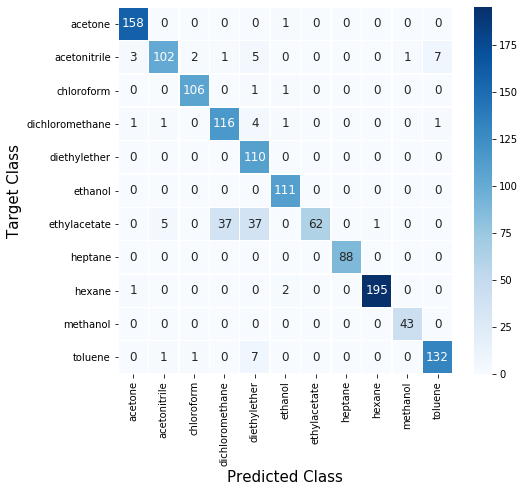

In [18]:
cats = []
for key in cat_dict:
    cats.append(key)
    
fig, ax = plt.subplots(figsize=(7.5,6.75))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, xticklabels = cats, yticklabels = cats, cmap="Blues", annot_kws={"size": 12})
ax.set_ylabel('Target Class', fontsize = 15)
ax.set_xlabel('Predicted Class', fontsize = 15)

In [19]:
report

{'acetone': {'precision': 0.9693251533742331,
  'recall': 0.9937106918238994,
  'f1-score': 0.9813664596273292,
  'support': 159},
 'acetonitrile': {'precision': 0.9357798165137615,
  'recall': 0.8429752066115702,
  'f1-score': 0.8869565217391305,
  'support': 121},
 'chloroform': {'precision': 0.9724770642201835,
  'recall': 0.9814814814814815,
  'f1-score': 0.9769585253456222,
  'support': 108},
 'dichloromethane': {'precision': 0.7532467532467533,
  'recall': 0.9354838709677419,
  'f1-score': 0.8345323741007193,
  'support': 124},
 'diethylether': {'precision': 0.6707317073170732,
  'recall': 1.0,
  'f1-score': 0.8029197080291971,
  'support': 110},
 'ethanol': {'precision': 0.9568965517241379,
  'recall': 1.0,
  'f1-score': 0.9779735682819383,
  'support': 111},
 'ethylacetate': {'precision': 1.0,
  'recall': 0.43661971830985913,
  'f1-score': 0.607843137254902,
  'support': 142},
 'heptane': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 88},
 'hexane': {'precision'

In [20]:
###DONT RUN AGAIN#####
wb = load_workbook(filename='LSTM_prof_val_results.xlsx')
ws = wb.worksheets[1]

init_col = 5
init_row = 5
cur_col = init_col
cur_row = init_row

for key in cat_dict:
    cur_col = init_col
    for metric in ['precision', 'recall', 'f1-score']:
        ws.cell(row=cur_row, column = cur_col).value = report[key][metric]
        cur_col += 1
    cur_row += 1

cur_col += 1
ws.cell(row=cur_row, column = cur_col).value = report['accuracy']
cur_col += 1
ws.cell(row=cur_row, column = cur_col).value = report['macro avg']['f1-score']
    

    
wb.save('LSTM_prof_val_results.xlsx')